# Compute Sentiment for All Covid Tweets

In [2]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/processed/tx.csv', lineterminator='\n')
pd.set_option('display.max_columns', None)

#### combine hashtags and text

In [4]:
df['all_text'] = df['hashtags'] + ' ' + df['text']

#### calculate sentiment

In [5]:
df['TB_polarity'] = df['all_text'].map(lambda x: TextBlob(str(x)).sentiment.polarity)
df['TB_subjectivity'] = df['all_text'].map(lambda x: TextBlob(str(x)).sentiment.subjectivity)


#### remove rows without text

In [6]:
df = df[df['all_text'].notna()]

#### convert created_at to datetime object, set date as index, drop unnecessary columns

In [7]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

df = df.set_index(df['created_at'])

df = df.loc[:, ['all_text', 'TB_polarity', 'TB_subjectivity']]

df.index = pd.to_datetime(df.index)

#### save file

In [8]:
# df.to_hdf('./data/processed/tx_sentiment_all.hdf', key='df')

#### groupby dates, calculate mean sentiment per day

In [9]:
df1 = df.groupby('created_at').mean()
df2 = df.groupby('created_at').std()


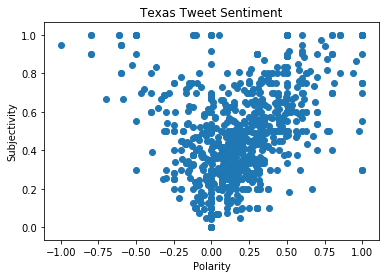

In [12]:
plt.scatter(df['TB_polarity'], df['TB_subjectivity']);
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Texas Tweet Sentiment');


In [186]:
df2.columns = ['TB_polarity_std', 'TB_subjectivity_std']

In [187]:
df = pd.concat([df1, df2], axis=1)
df

,TB_polarity,TB_subjectivity,TB_polarity_std,TB_subjectivity_std
created_at,,,,
2020-03-20,0.120833,0.137500,0.165202,0.213600
2020-03-21,0.053976,0.259444,0.362793,0.300668
2020-03-22,0.245297,0.299603,0.260400,0.295728
2020-03-23,0.108275,0.182609,0.240680,0.309254
2020-03-24,0.048433,0.225880,0.291787,0.347307
...,...,...,...,...
2020-07-31,0.132792,0.182522,0.187797,0.258125
2020-08-01,0.218087,0.467235,0.167979,0.270032
2020-08-02,0.233565,0.438889,0.363853,0.285709


#### save file

In [188]:
df.to_hdf('./data/processed/ga_sentiment_mean.hdf', key='df')